# PDP Comparison - final visualisations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from RashomonSetAnalyser import RashomonSetAnalyser

In [3]:
rashomon = RashomonSetAnalyser()
rashomon.pdp_measures = pd.read_csv('abs_sum.csv')
rashomon.rashomon_search_results = pd.read_csv('results.csv')

### Rashomon ratio plot

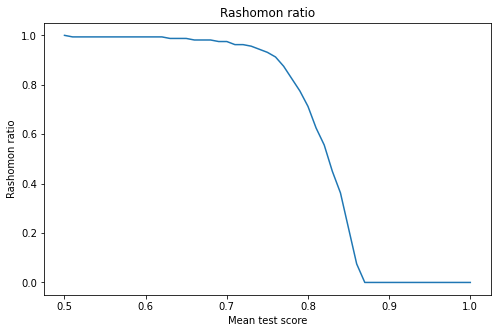

In [4]:
rashomon.rashomon_ratio_plot(figsize = (8, 5))

### Models we take into account

In [5]:
results = rashomon.rashomon_search_results[['mean_test_score']].sort_values(by = 'mean_test_score', ascending = False).head(10)
results['label'] = ['base_model', 'model0', 'model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7', 'model8']
results = results.set_index('label')
results

,mean_test_score
label,
base_model,0.865012
model0,0.864551
model1,0.864439
model2,0.863227
model3,0.863032
model4,0.862581
model5,0.862466
model6,0.862002
model7,0.861491


### PDP Comparison results

In [6]:
rashomon.pdp_measures.head()

,colname,model0,model1,model2,model3,model4,model5,model6,model7,model8
0,albumin_min,0.895708,1.094565,1.101840,0.639512,0.796659,0.132743,0.520099,0.811134,0.312614
1,bicarbonate_min,0.823801,0.984589,1.078355,0.528898,0.841015,0.206143,0.380499,1.014646,0.592612
2,bun_min,0.776521,0.472627,0.804022,0.629305,0.489900,0.039225,0.189107,0.600329,0.511266
3,calcium_min,1.430521,2.199248,2.140283,1.534680,1.547932,1.145182,1.136423,1.589801,1.202206
4,creatinine_min,0.568789,1.775589,1.311487,0.655352,0.605490,0.560761,0.166061,0.644348,0.498596


### Boxplot per model

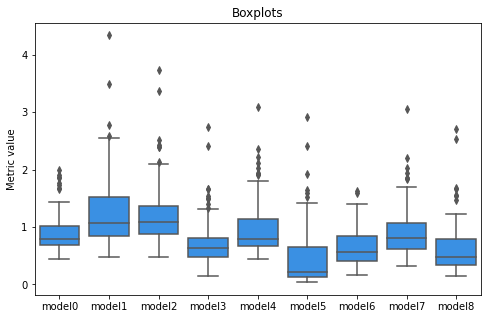

In [7]:
rashomon.boxplots_models(figsize = (8, 5))

### Boxplots per feature

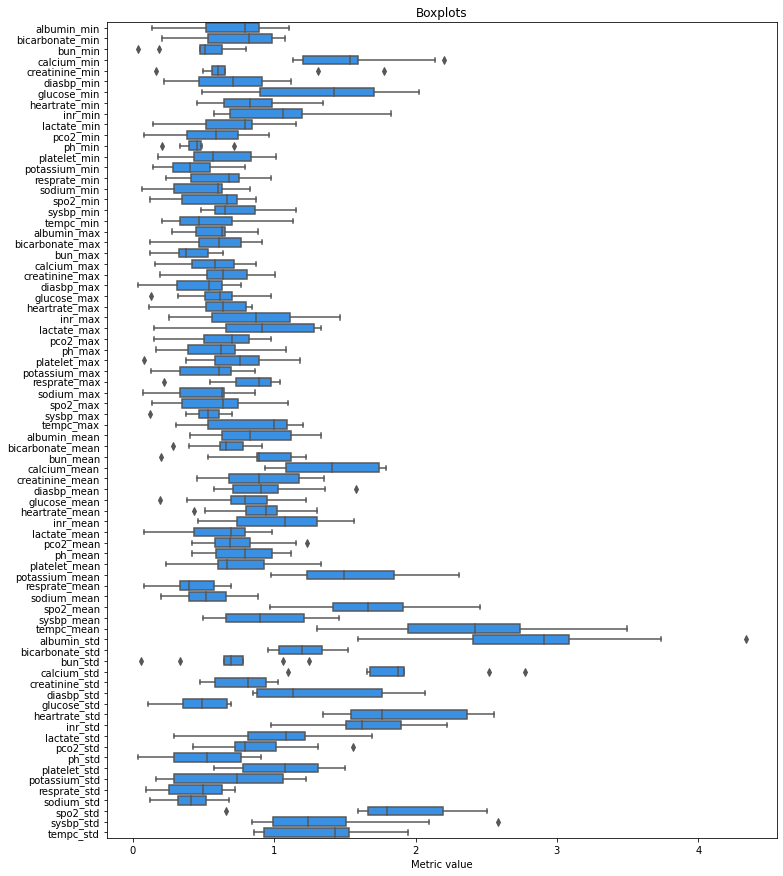

In [8]:
rashomon.boxplots(xlabels = True, figsize = (12, 15))

### PDP Curves for most different features

In [9]:
import pickle
X = np.load("X48.npy")
column_names = np.load('column_names.npy', allow_pickle = True)
X = pd.DataFrame(data = X, columns = column_names)
with open('y.npy', 'rb') as f:
    labels = pickle.load(f)
    
task = [yy[0] for yy in labels]
y = np.array(task)

In [10]:
with open('top_eight_models.npy', 'rb') as f:
    models = pickle.load(f)
    
with open('base_model.npy', 'rb') as f:
    base_model = pickle.load(f)

In [11]:
rashomon.models = models
rashomon.base_model = base_model

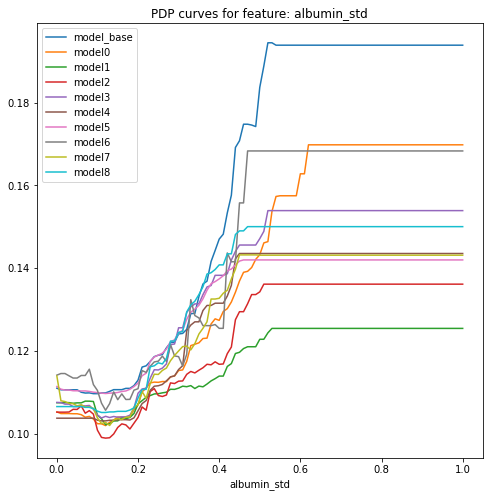

In [12]:
rashomon.pdp_profile(X, y, features = ['albumin_std'], figsize=(8, 8))

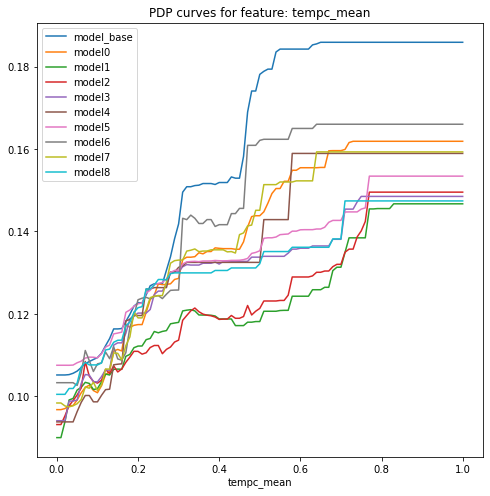

In [13]:
rashomon.pdp_profile(X, y, features = ['tempc_mean'], figsize=(8, 8))